<a href="https://colab.research.google.com/github/zdvinkofff/Developer-AI/blob/main/%22Death_COVID_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мы уже второй год живем в ситуации пандемии. За это время собрано много информации по теме заболевания COVID-19. Одним из базовых источников информации по распространению инфекции является датасет, который ведёт Университет Джона Хопкинса (https://github.com/CSSEGISandData/COVID-19). Там ведется ежедневная статистика по количеству выявленных случаев заражения, числу выздоровевших, а также числу людей, погибших от коронавируса.



Проведите анализ данных за последний год от даты сдачи задания на проверку. Работу выполняйте в виде блокнота для Google Colab. Используя изученные на прошлых занятиях методы, проведите кластеризацию стран по показателям заболеваемости, смертности и выздоровлений за прошедшие сутки. Визуализируйте результаты. Сколько получилось кластеров? Где оказалась Россия? Сделайте выводы. Проведите аналогичный анализ для каждого из 12 предыдущих месяцев. Есть ли различие в кластерах? Если есть, то как его можно объяснить?

In [ ]:
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tslearn
import matplotlib.pyplot as plt
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tslearn.utils import to_time_series_dataset

In [ ]:
data = '/content/time_series_covid19_deaths_global.csv' # загрузим датасет подтвержденных смертей и выведем его на экран
df = pd.read_csv(data, sep=',')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,158,158,158,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4022


In [ ]:
df = df.drop(columns=['Province/State', 'Country/Region'], axis=1) #удалим столбцы со строковыми значениями
df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,33.939110,67.709953,0,0,0,0,0,0,0,0,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,41.153300,20.168300,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,28.033900,1.659600,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,42.506300,1.521800,0,0,0,0,0,0,0,0,...,158,158,158,165,165,165,165,165,165,165
4,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,31.952200,35.233200,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,39.904200,116.407400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,15.552727,48.516388,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,-13.133897,27.849332,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4022


In [ ]:
df.fillna(0, inplace=True) #все значения NaN в датасете заменим на 0

2


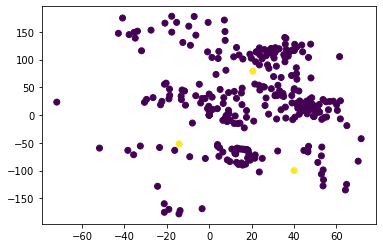

3


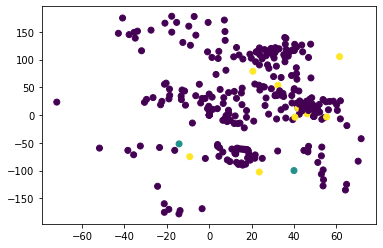

4


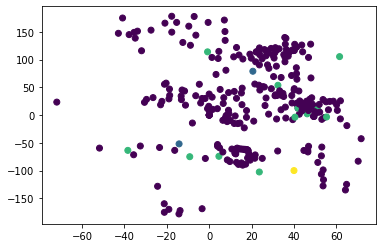

5


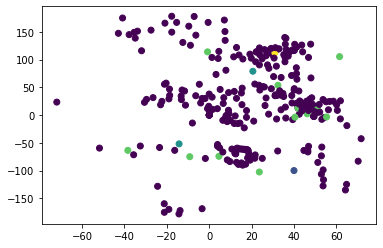

6


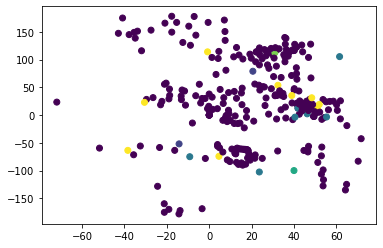

7


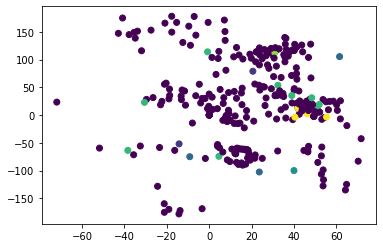

8


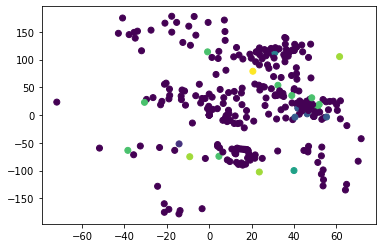

9


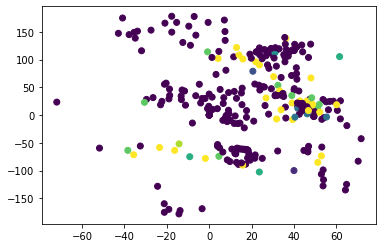

10


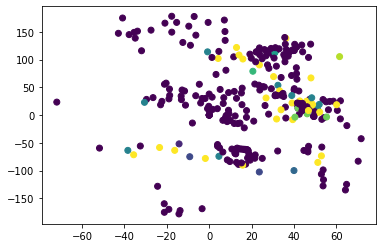

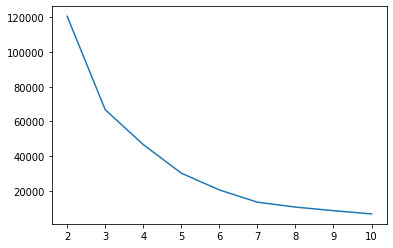

In [ ]:
sc = StandardScaler() #Стандартизируем функции и вычислим количество кластеров, построим графики
scaledDF = sc.fit_transform(df)
wcss = []
for i in range(2, 11):
  kmean = KMeans(n_clusters=i)
  kmean.fit(scaledDF)
  print(i)
  plt.scatter(df['Lat'], df['Long'], c=kmean.labels_)
  plt.show()
  wcss.append(kmean.inertia_)
plt.plot(range(2, 11), wcss)
plt.show()

In [ ]:
w = TimeSeriesKMeans(n_clusters=6)#Кластеризация для временных рядов

In [ ]:
ts = to_time_series_dataset(df)#Преобразуем набор данных временных рядов, чтобы он соответствовал формату, используемому в моделях tslearn.

In [ ]:
w.fit(ts[:, :1000])#Вычислим кластеризацию временных рядов

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]#Определим, к какому кластеру относится Россия

4

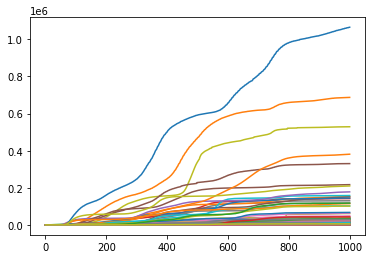

In [ ]:
for i in range(len(ts)):#Построим график по странам за весь срок
  plt.plot(ts[i, :1000])

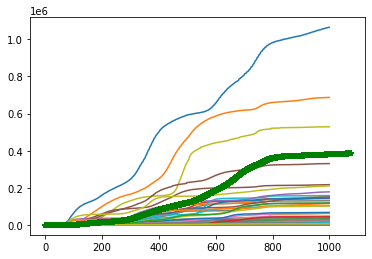

In [ ]:
for i in range(len(ts)): #Россия на этом графике
  plt.plot(ts[i, :1000])
  plt.plot(ts[221], marker='*', color='green')

ДЕКАБРЬ

In [ ]:
w.fit(ts[:, 1040:-1])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
clusterRus = []

In [ ]:
w.labels_

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [ ]:
w.labels_[221]

3

In [ ]:
clusterRus.append(w.labels_[221])

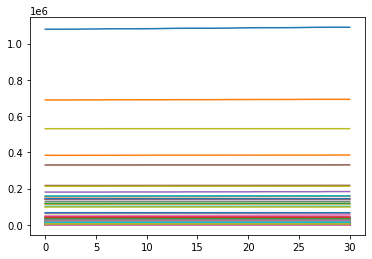

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 1040:-1])

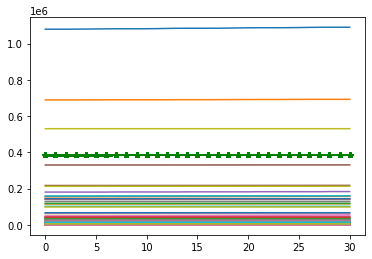

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 1040:-1])
  plt.plot(ts[221, 1040:-1], marker='*', color='green')

НОЯБРЬ

In [ ]:
w.fit(ts[:, 1010:1041])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 0, 0, 0, 5, 0, 0, 1, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 1, 2, 2, 5, 0, 0,
       2, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 2, 5, 2, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 2, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

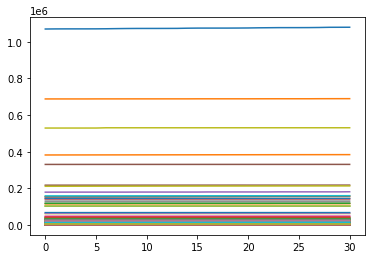

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 1010:1041])

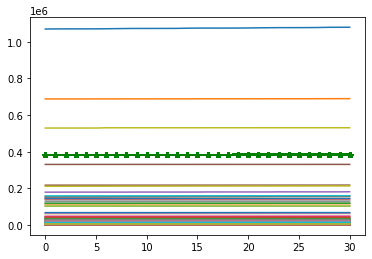

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 1010:1041])
  plt.plot(ts[221, 1010:1041], marker='*', color='green')

ОКТЯБРЬ

In [ ]:
w.fit(ts[:, 980:1011])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 0, 0, 0, 5, 0, 0, 1, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 4, 2, 2, 5, 0, 0,
       2, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 2, 5, 2, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 2, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

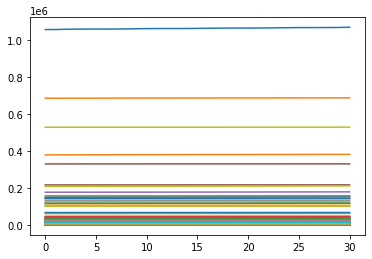

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 980:1011])

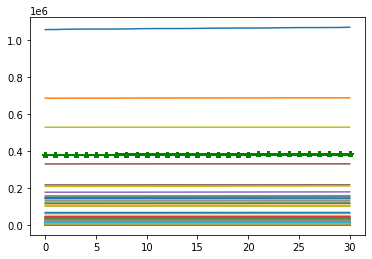

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 980:1011])
  plt.plot(ts[221, 980:1011], marker='*', color='green')

СЕНТЯБРЬ

In [ ]:
w.fit(ts[:, 950:981])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

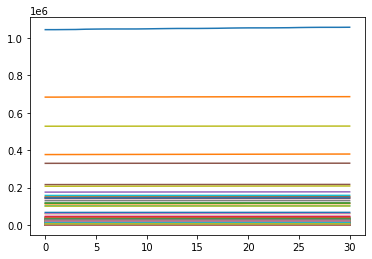

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  950:981])

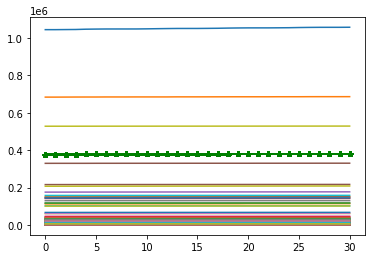

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 950:981])
  plt.plot(ts[221, 950:981], marker='*', color='green')

АВГУСТ

In [ ]:
w.fit(ts[:, 920:951])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 5, 5, 5, 0, 0, 5, 1, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 0, 3, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 1, 3, 3, 0, 5, 5,
       3, 5, 0, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 0, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 3, 0, 3, 0, 5,
       0, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 3, 5, 3,
       0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 3, 5, 2, 5, 3, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5,
       5, 5, 5])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

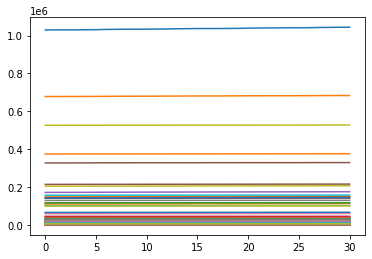

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  920:951])

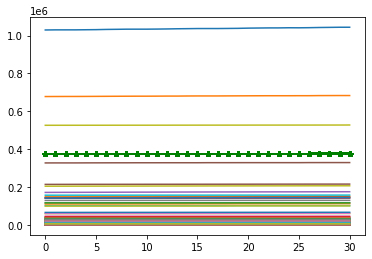

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 920:951])
  plt.plot(ts[221, 920:951], marker='*', color='green')

ИЮЛЬ

In [ ]:
w.fit(ts[:, 890:921])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 0, 0, 0, 5, 0, 0, 1, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 1, 3, 3, 5, 0, 0,
       3, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 3, 5, 3, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 3, 0, 2, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

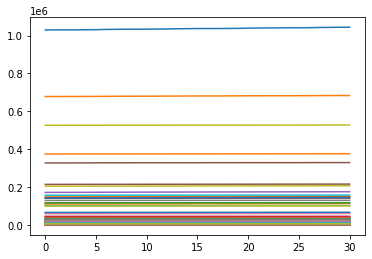

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  920:951])

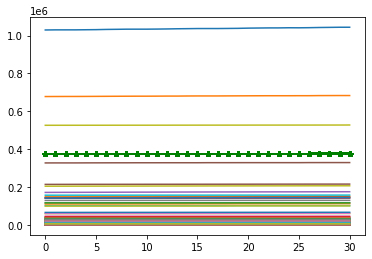

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 920:951])
  plt.plot(ts[221, 920:951], marker='*', color='green')

ИЮНЬ

In [ ]:
w.fit(ts[:, 890:921])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 0, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 3, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

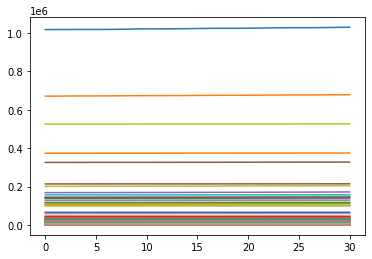

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  890:921])

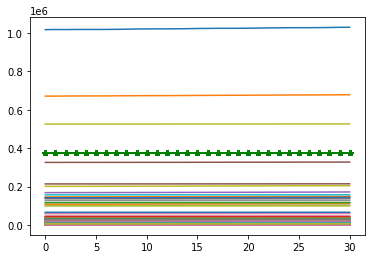

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 890:921])
  plt.plot(ts[221, 890:921], marker='*', color='green')

МАЙ

In [ ]:
w.fit(ts[:, 860:891])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 1, 1, 1, 5, 1, 1, 2, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 2, 0, 0, 5, 1, 1,
       0, 1, 5, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 0, 5, 0, 5, 1,
       5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 0, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 1])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

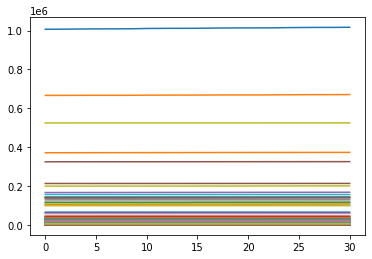

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  860:891])

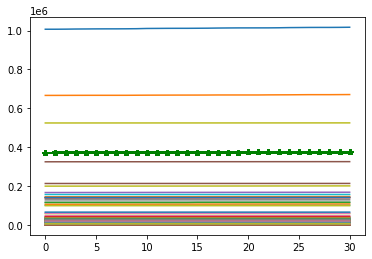

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 860:891])
  plt.plot(ts[221, 860:891], marker='*', color='green')

АПРЕЛЬ

In [ ]:
w.fit(ts[:, 830:861])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 0, 0, 0, 5, 5, 0, 3, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 5, 2, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 3, 2, 2, 5, 0, 0,
       2, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 2, 5, 2, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 2, 0, 2,
       5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

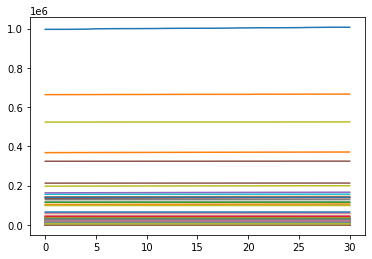

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  830:861])

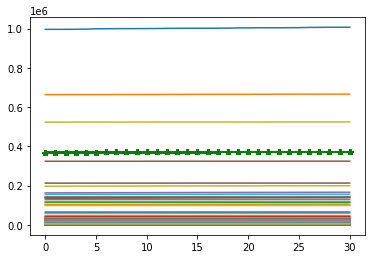

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 830:861])
  plt.plot(ts[221, 830:861], marker='*', color='green')


МАРТ

In [ ]:
w.fit(ts[:, 800:831])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0,
       5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

2

In [ ]:
clusterRus.append(w.labels_[221])

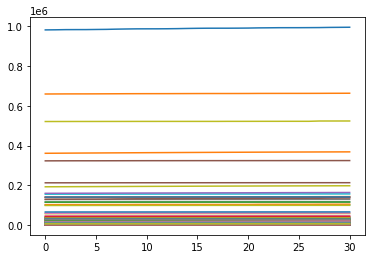

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  800:831])

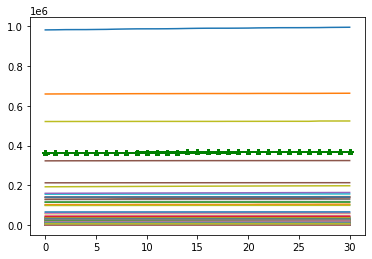

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 800:831])
  plt.plot(ts[221, 800:831], marker='*', color='green')

ФЕВРАЛЬ

In [ ]:
w.fit(ts[:, 770:801])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

5

In [ ]:
clusterRus.append(w.labels_[221])

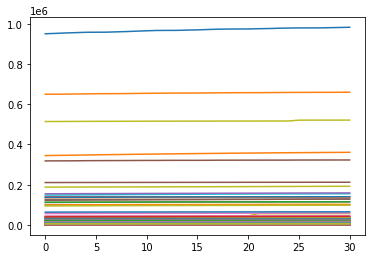

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i,  770:801])

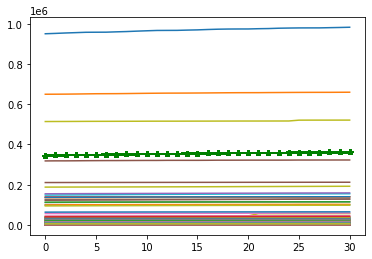

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 770:801])
  plt.plot(ts[221, 770:801], marker='*', color='green')

ЯНВАРЬ

In [ ]:
w.fit(ts[:, 740:771])

TimeSeriesKMeans(n_clusters=6)

In [ ]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 0, 0, 0, 5, 5, 0, 1, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 5, 2, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 1, 2, 2, 5, 0, 0,
       2, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 2, 5, 2, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 2, 0, 2,
       5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 2, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0])

In [ ]:
w.labels_[221]

4

In [ ]:
clusterRus.append(w.labels_[221])

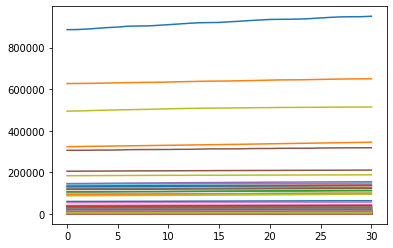

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 740:771])

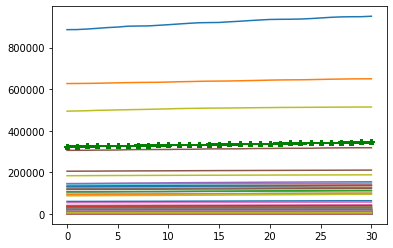

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i, 740:771])
  plt.plot(ts[221, 740:771], marker='*', color='green')

In [ ]:
clusterRus

[3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5, 4]

In [ ]:
clusterRus.reverse()
clusterRus

[4, 5, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3]

Можно сделать вывод, что Россия выделяется на фоне других стран по подтвержденным смертям. Количество неподтвержденных смертей может быть достаточно высоко.